# Approaching red lights, optimally

Evaluation performance:

$\xi = x_\text{g} - \frac{(v_\text{max}-v_\text{g})^2}{2a_\text{max}}$

In [1]:
%matplotlib inline

from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from trafficLight.simulation import Simulation
from trafficLight.trafficLight import UniformTrafficLight
from trafficLight.controller import LinearController, PowerLawController, LateBrakeController, CheatController
from trafficLight.visualization import showTrajectory
from trafficLight.evaluation import score
import trafficLight.constants as constants

uniformTrafficLight = UniformTrafficLight(constants.MAX_TIME)

## Comparison of different basic strategies

In [3]:
def runSimulations(drivers, trafficLight):
    simulations = [Simulation(driver, logging=True) for driver in drivers]

    for sim in simulations:
        sim.run()

    scores = OrderedDict()
    for sim in simulations:
        name = str(sim.driver)
        scores[name] = score(sim, trafficLight)

    return simulations, scores

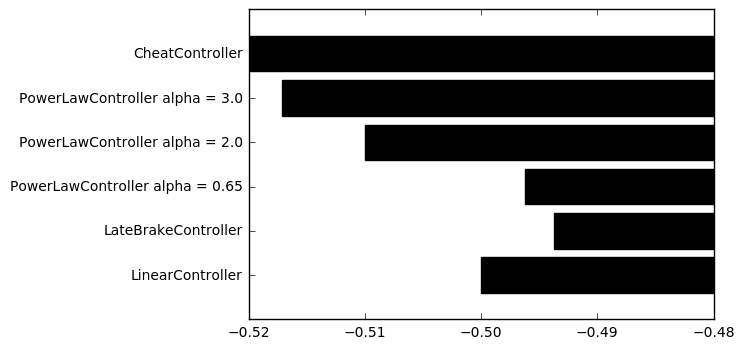

In [4]:
drivers = [
    LinearController(),
    LateBrakeController(),
    PowerLawController(0.65),
    PowerLawController(2.0),
    PowerLawController(3.0),
    CheatController()
]

sims, scores = runSimulations(drivers, uniformTrafficLight)

xs = list(range(len(scores)))
plt.barh(xs, list(scores.values()), color='k', align='center',
         tick_label=scores.keys())
plt.xlim([-.52, -.48]);

## Plot the trajectories

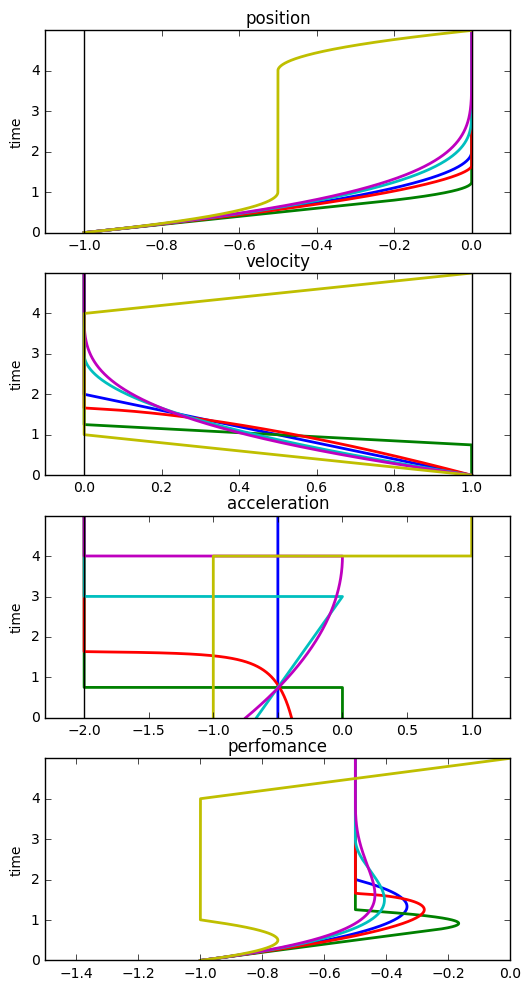

In [10]:
plt.figure(figsize=(6, 12))
showTrajectory([sim.log for sim in sims])

## Compare different PowerLawControllers

In [5]:
alphas = np.arange(0.5, 6.0, 0.1)
drivers = [PowerLawController(a) for a in alphas]

sims, scores = runSimulations(drivers, uniformTrafficLight)

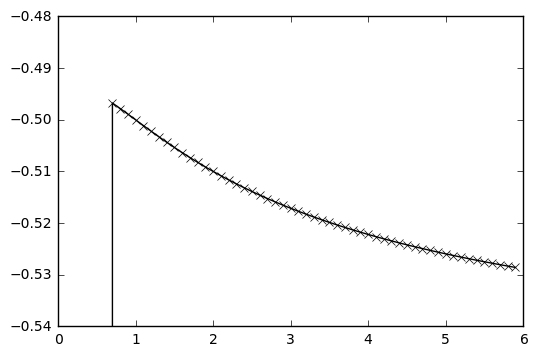

In [10]:
plt.plot(alphas, list(scores.values()), '-xk')
plt.ylim([-.54, -0.48]);

In [13]:
np.array(list(scores.values())).max()

-0.49675952234439535

### Plot the final position (check numerical problems)

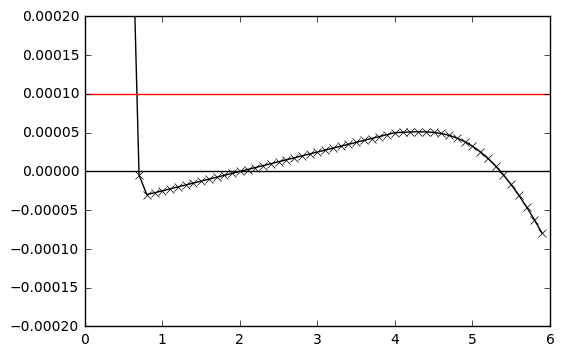

In [14]:
endpos = [sim.log[-1].pos for sim in sims]
plt.plot(alphas, endpos, '-xk')
plt.ylim([-0.0002, 0.0002])
plt.axhline(y=constants.RUNNING_RED_LIGHT_EPSILON,
            xmin=0, xmax=1, color='r')
plt.axhline(y=0, xmin=0, xmax=1, color='k');

## Benchmarks

In [15]:
%%timeit

driver = PowerLawController(1.4)
sim = Simulation(driver, logging=True)
sim.run()

1 loop, best of 3: 285 ms per loop
